In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load and Visualise The Data
    
    -> Load
    -> Visualise
    -> Normalisation

In [2]:
# Load
X = pd.read_csv("Datasets/Linear_X_Train.csv")
y = pd.read_csv("Datasets/Linear_Y_Train.csv")

In [3]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [4]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


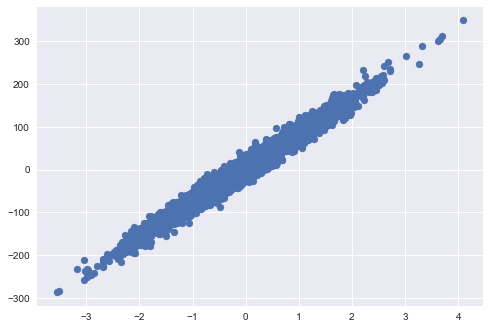

In [5]:
# Visualise
plt.style.use('seaborn')
plt.scatter(X,y)
plt.show()

In [6]:
print(X.shape, y.shape)

(3750, 1) (3750, 1)


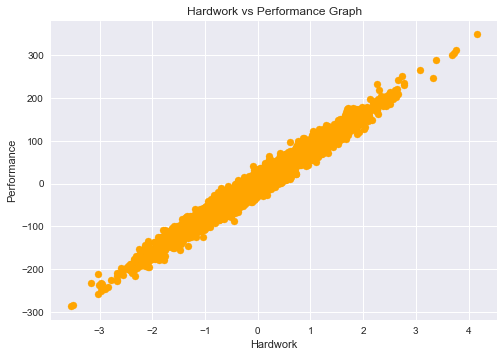

In [7]:
# Convert X, y to Numpy Arrays
X = X.values
y = y.values

# Normalisation (of X)
u = X.mean()
std = X.std()
X = (X-u)/std

plt.style.use('seaborn')
plt.scatter(X,y, color="orange")
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

## 2. Linear Regression

In [8]:
def hypothesis(x, theta):
    # theta = [theta0, theta1]
    
    y_ = theta[0] + (theta[1] * x)
    
    return y_

In [9]:
def gradient(X, Y, theta):
    
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        
        grad[0] += (y_ - y)
        grad[1] += (y_ - y) * x
        
    return (grad/m)

In [10]:
def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2
    return (total_error/m)

In [11]:
def gradientDescent(X, Y, max_steps = 100, learning_rate = 0.1):
    # learning_rate is a hyper-parameter, we need to try for different values to optimize
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_steps):
        # Compute Grad
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        # Update Theta
        theta[0] = theta[0] - (learning_rate * grad[0])
        theta[1] = theta[1] - (learning_rate * grad[1])
        
        # Storing Theta And Error Values During Updates
        theta_list.append((theta[0], theta[1]))
        error_list.append(e)

        
    return theta, error_list, theta_list

In [12]:
theta, error_list, theta_list = gradientDescent(X, y)
print(theta)

[ 0.6838508  79.90361453]


In [13]:
print(error_list)

[array([6576.35005246]), array([5363.12510257]), array([4380.41289317]), array([3584.41600355]), array([2939.65852295]), array([2417.40496367]), array([1994.37958066]), array([1651.72902041]), array([1374.18206661]), array([1149.36903404]), array([967.27047765]), array([819.77064698]), array([700.29578413]), array([603.52114523]), array([525.13368772]), array([461.63984713]), array([410.20983626]), array([368.55152745]), array([334.80829731]), array([307.47628091]), array([285.33734761]), array([267.40481165]), array([252.87945752]), array([241.11392067]), array([231.58383582]), array([223.8644671]), array([217.61177843]), array([212.54710061]), array([208.44471157]), array([205.12177646]), array([202.43019901]), array([200.25002128]), array([198.48407732]), array([197.05366271]), array([195.89502687]), array([194.95653185]), array([194.19635088]), array([193.58060429]), array([193.08184956]), array([192.67785822]), array([192.35062524]), array([192.08556653]), array([191.87086897]), a

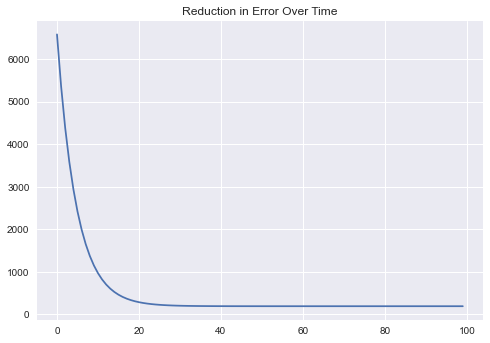

In [14]:
plt.plot(error_list)
plt.title("Reduction in Error Over Time")
plt.show()

## 3. Predictions and Best Line

In [15]:
y_ = hypothesis(X, theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


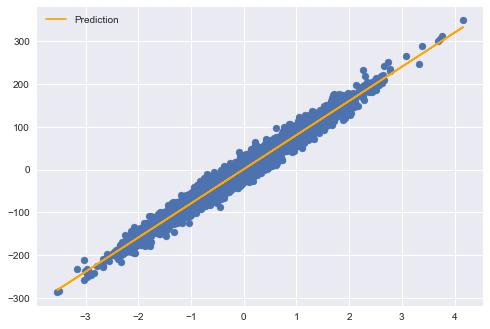

In [16]:
# Training Data + Predictions

plt.scatter(X, y)
plt.plot(X, y_, color='orange', label="Prediction")
plt.legend()
plt.show()

In [17]:
# Load the Test Data
X_test = pd.read_csv("Datasets/Linear_X_Test.csv").values
y_test = hypothesis(X_test, theta)
print(y_test.shape)
print(y_test)

(1250, 1)
[[-149.37069577]
 [ -68.75494042]
 [-201.48687035]
 ...
 [  10.9121384 ]
 [ -21.53235759]
 [ -53.68460035]]


In [18]:
df = pd.DataFrame(data=y_test, columns=["y"])
# df.to_csv("y_prediction.csv", index=False)
df.head()

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897


### 4. Computing Score

### Score : R2 (R-Squared) or Coefficient of Determination

In [19]:
def r2_score(Y, Y_):
    # Instead of Loop, np.sum is Recommended as it is Fast
    numerator = np.sum((Y-Y_)**2)
    denominator = np.sum((Y - Y.mean())**2)
    score = (1 - (numerator/denominator))
    return (score*100)

In [20]:
print(r2_score(y, y_))

97.09612226971643


## 5. Visualising Loss Function, Gradient Descent, Theta Updates

In [21]:
from mpl_toolkits.mplot3d import Axes3D

In [22]:
print(theta)

[ 0.6838508  79.90361453]


In [23]:
# Plot of Loss Function
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j] * X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]
        
# print(J)
print(J.shape)

(80, 80)


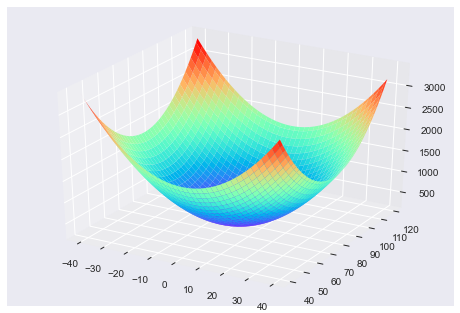

In [24]:
# Visualise The Loss

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()

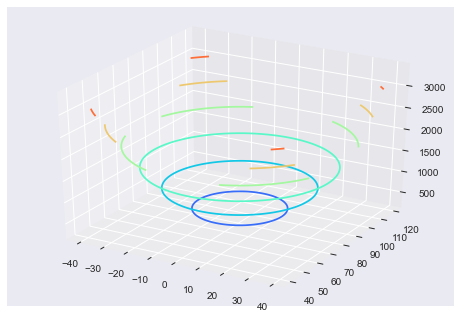

In [25]:
# Contour Plot

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
plt.show()

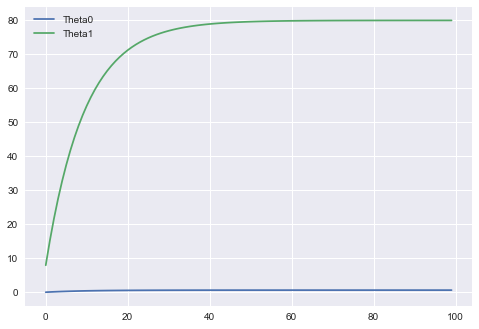

In [26]:
# Plot the Changes in Values of Theta
theta_list = np.array(theta_list)

plt.plot(theta_list[:,0], label="Theta0")
plt.plot(theta_list[:,1], label="Theta1")
plt.legend()
plt.show()

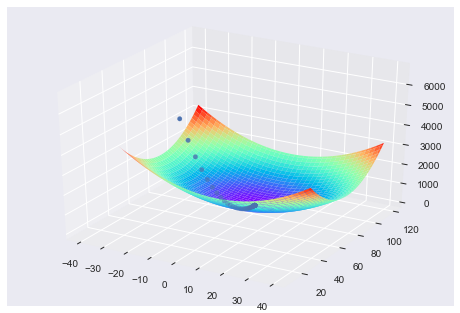

In [27]:
# Trajectory Traced By The Theta Updates in the Loss Function

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list)
plt.show()

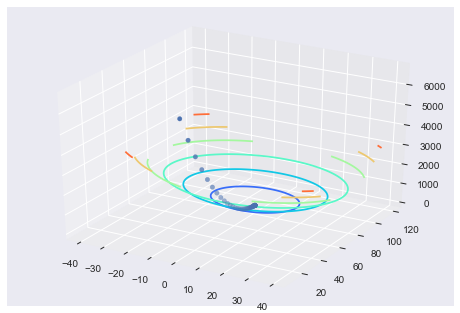

In [28]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list) # error_list for elevation
plt.show()

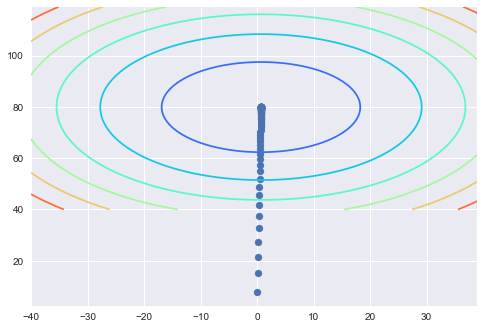

In [29]:
# 2D Contour Plot | Top View
plt.contour(T0, T1, J, cmap='rainbow')
plt.scatter(theta_list[:,0], theta_list[:,1])
plt.show()

In [30]:
# Save the Data in File
np.save("ThetaList.npy", theta_list)